In [1]:
import sys
sys.path.append('..')

In [2]:
from database import TextFiles
from analytics import create_article_df, groupby_newspaper

db = TextFiles('final')
articles = db.get_all_articles()

In [3]:
df = create_article_df(articles)
print(df.dtypes)

df.head()

newspaper_id                   object
body                           object
headline                       object
article_url                    object
article_id                     object
date_published    datetime64[ns, UTC]
date_modified                  object
date_uploaded                  object
newspaper                      object
newspaper_url                  object
dtype: object


,newspaper_id,body,headline,article_url,article_id,date_published,date_modified,date_uploaded,newspaper,newspaper_url
0,nzherald,Preparing New Zealand's water stores for a wa...,Preparing New Zealand for climate change,https://www.nzherald.co.nz/nz/news/article.cfm...,11800198,2017-02-13 19:50:05+00:00,2017-07-20T12:00:42.990Z,2020-07-09T23:13:59.445154,The New Zealand Herald,nzherald.co.nz
1,nzherald,LONDON - The global warming danger threshold ...,Planet a decade from global warming point of n...,https://www.nzherald.co.nz/world/news/article....,10007899,2005-01-24 19:35:21+00:00,2017-11-23T05:49:23.038Z,2020-07-09T23:17:57.984039,The New Zealand Herald,nzherald.co.nz
2,nzherald,There are no new cases of Covid-19 in New Zea...,Another zero day - no new cases of Covid-19,https://www.nzherald.co.nz/nz/news/article.cfm...,12344572,2020-07-01 01:27:05+00:00,2020-07-01T02:03:23.768Z,2020-07-09T23:15:15.800920,The New Zealand Herald,nzherald.co.nz
3,nzherald,New Zealand's agribusiness sector has excitin...,Fenwick Forum leaders propose agri industry tr...,https://www.nzherald.co.nz/business/news/artic...,12343034,2020-06-30 16:59:08+00:00,2020-06-30T03:48:36.116Z,2020-07-09T23:14:50.000862,The New Zealand Herald,nzherald.co.nz
4,nzherald,A Connecticut lawmaker wants to strike climat...,Growing call for climate change 'alternatives'...,https://www.nzherald.co.nz/world/news/article....,12210364,2019-03-06 21:30:15+00:00,2019-03-06T21:53:30.642Z,2020-07-09T23:12:53.149466,The New Zealand Herald,nzherald.co.nz


In [4]:
years = df.groupby(df.loc[:, 'date_published'].dt.year).count()
years

,newspaper_id,body,headline,article_url,article_id,date_published,date_modified,date_uploaded,newspaper,newspaper_url
date_published,,,,,,,,,,
1970.0,20,20,20,20,20,20,20,20,20,20
1997.0,1,1,1,1,1,1,1,1,1,1
1999.0,1,1,1,1,1,1,1,1,1,1
2000.0,1,1,1,1,1,1,1,1,1,1
2001.0,10,10,10,10,10,10,10,10,10,10
2002.0,5,5,5,5,5,5,5,5,5,5
2004.0,2,2,2,2,2,2,2,2,2,2
2005.0,8,8,8,8,8,8,8,8,8,8
2006.0,9,9,9,9,9,9,9,9,9,9


<BarContainer object of 23 artists>

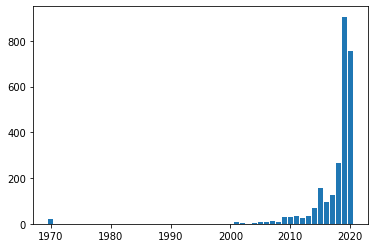

In [5]:
!pip install matplotlib -Uq
import matplotlib.pyplot as plt

f, axes = plt.subplots()

axes.bar(x=years.index, height=years.loc[:, 'newspaper'])

In [6]:
lens = groupby_newspaper(df)

In [7]:
lens

,newspaper_id,average_article_length,article_count
0,economist,1087.430799,513
1,guardian,953.455635,417
2,nytimes,1249.790087,343
3,nzherald,794.047771,314
4,fox,632.849673,306
5,stuff,745.772727,286
6,newshub,440.790123,243
7,skyau,123.926316,190


In [8]:
lens.to_dict(orient='records')

[{'newspaper_id': 'economist',
  'average_article_length': 1087.430799220273,
  'article_count': 513},
 {'newspaper_id': 'guardian',
  'average_article_length': 953.4556354916067,
  'article_count': 417},
 {'newspaper_id': 'nytimes',
  'average_article_length': 1249.7900874635568,
  'article_count': 343},
 {'newspaper_id': 'nzherald',
  'average_article_length': 794.047770700637,
  'article_count': 314},
 {'newspaper_id': 'fox',
  'average_article_length': 632.8496732026143,
  'article_count': 306},
 {'newspaper_id': 'stuff',
  'average_article_length': 745.7727272727273,
  'article_count': 286},
 {'newspaper_id': 'newshub',
  'average_article_length': 440.7901234567901,
  'article_count': 243},
 {'newspaper_id': 'skyau',
  'average_article_length': 123.92631578947369,
  'article_count': 190}]